In [2]:
from __future__ import annotations
import sys
    # caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(1, 'D:/books/python/0.Data Science from Scratch- First Principles with Python/data-science-from-scratch/scratch/')
sys.path

['D:\\books\\python\\0.Data Science from Scratch- First Principles with Python',
 'D:/books/python/0.Data Science from Scratch- First Principles with Python/data-science-from-scratch/scratch/',
 'C:\\Users\\lidan\\miniconda3\\python38.zip',
 'C:\\Users\\lidan\\miniconda3\\DLLs',
 'C:\\Users\\lidan\\miniconda3\\lib',
 'C:\\Users\\lidan\\miniconda3',
 '',
 'C:\\Users\\lidan\\AppData\\Roaming\\Python\\Python38\\site-packages',
 'C:\\Users\\lidan\\miniconda3\\lib\\site-packages',
 'C:\\Users\\lidan\\miniconda3\\lib\\site-packages\\magic_impute-2.0.4-py3.8.egg',
 'C:\\Users\\lidan\\miniconda3\\lib\\site-packages\\seqc-0.2.0-py3.8.egg',
 'C:\\Users\\lidan\\miniconda3\\lib\\site-packages\\weasyprint-56.1-py3.8.egg',
 'C:\\Users\\lidan\\miniconda3\\lib\\site-packages\\cairocffi-1.3.0-py3.8.egg',
 'C:\\Users\\lidan\\miniconda3\\lib\\site-packages\\win32',
 'C:\\Users\\lidan\\miniconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\lidan\\miniconda3\\lib\\site-packages\\Pythonwin']

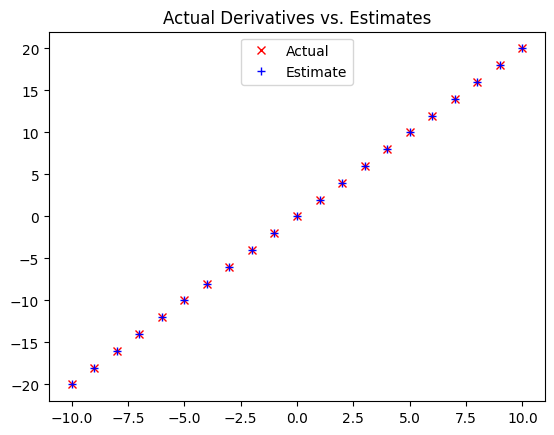

0 [9.36104554757935, -6.643102096173858, -7.754616254074222]
1 [9.173824636627764, -6.510240054250381, -7.599523928992737]
2 [8.990348143895208, -6.3800352531653735, -7.447533450412883]
3 [8.810541181017303, -6.252434548102066, -7.298582781404625]
4 [8.634330357396957, -6.127385857140025, -7.152611125776533]
5 [8.461643750249017, -6.004838139997225, -7.009558903261002]
6 [8.292410875244038, -5.8847413771972805, -6.869367725195782]
7 [8.126562657739157, -5.767046549653335, -6.731980370691867]
8 [7.964031404584374, -5.6517056186602685, -6.597340763278029]
9 [7.8047507764926864, -5.538671506287063, -6.465393948012468]
10 [7.648655760962833, -5.427898076161322, -6.336086069052219]
11 [7.495682645743576, -5.319340114638095, -6.209364347671174]
12 [7.345768992828705, -5.212953312345333, -6.085177060717751]
13 [7.198853612972131, -5.108694246098427, -5.963473519503395]
14 [7.054876540712689, -5.006520361176459, -5.844204049113327]
15 [6.913779009898435, -4.90638995395293, -5.72731996813106]
1

In [6]:
from linear_algebra import Vector, dot

def sum_of_squares(v: Vector) -> float:
    """Computes the sum of squared elements in v"""
    return dot(v, v)

from typing import Callable

def difference_quotient(f: Callable[[float], float],
                        x: float,
                        h: float) -> float:
    return (f(x + h) - f(x)) / h

def square(x: float) -> float:
    return x * x

def derivative(x: float) -> float:
    return 2 * x

def estimate_gradient(f: Callable[[Vector], float],
                      v: Vector,
                      h: float = 0.0001):
    return [partial_difference_quotient(f, v, i, h)
            for i in range(len(v))]

import random
from linear_algebra import distance, add, scalar_multiply

def gradient_step(v: Vector, gradient: Vector, step_size: float) -> Vector:
    """Moves `step_size` in the `gradient` direction from `v`"""
    assert len(v) == len(gradient)
    step = scalar_multiply(step_size, gradient)
    return add(v, step)

def sum_of_squares_gradient(v: Vector) -> Vector:
    return [2 * v_i for v_i in v]

# x ranges from -50 to 49, y is always 20 * x + 5
inputs = [(x, 20 * x + 5) for x in range(-50, 50)]

def linear_gradient(x: float, y: float, theta: Vector) -> Vector:
    slope, intercept = theta
    predicted = slope * x + intercept    # The prediction of the model.
    error = (predicted - y)              # error is (predicted - actual)
    squared_error = error ** 2           # We'll minimize squared error
    grad = [2 * error * x, 2 * error]    # using its gradient.
    return grad

from typing import TypeVar, List, Iterator

T = TypeVar('T')  # this allows us to type "generic" functions

def minibatches(dataset: List[T],
                batch_size: int,
                shuffle: bool = True) -> Iterator[List[T]]:
    """Generates `batch_size`-sized minibatches from the dataset"""
    # Start indexes 0, batch_size, 2 * batch_size, ...
    batch_starts = [start for start in range(0, len(dataset), batch_size)]

    if shuffle: random.shuffle(batch_starts)  # shuffle the batches

    for start in batch_starts:
        end = start + batch_size
        yield dataset[start:end]

def main():
    xs = range(-10, 11)
    actuals = [derivative(x) for x in xs]
    estimates = [difference_quotient(square, x, h=0.001) for x in xs]
    
    # plot to show they're basically the same
    import matplotlib.pyplot as plt
    plt.title("Actual Derivatives vs. Estimates")
    plt.plot(xs, actuals, 'rx', label='Actual')       # red  x
    plt.plot(xs, estimates, 'b+', label='Estimate')   # blue +
    plt.legend(loc=9)
    plt.show()
    
    
    #plt.close()
    
    def partial_difference_quotient(f: Callable[[Vector], float],
                                    v: Vector,
                                    i: int,
                                    h: float) -> float:
        """Returns the i-th partial difference quotient of f at v"""
        w = [v_j + (h if j == i else 0)    # add h to just the ith element of v
             for j, v_j in enumerate(v)]
    
        return (f(w) - f(v)) / h
    
    
    # "Using the Gradient" example
    
    # pick a random starting point
    v = [random.uniform(-10, 10) for i in range(3)]
    
    for epoch in range(1000):
        grad = sum_of_squares_gradient(v)    # compute the gradient at v
        v = gradient_step(v, grad, -0.01)    # take a negative gradient step
        print(epoch, v)
    
    assert distance(v, [0, 0, 0]) < 0.001    # v should be close to 0
    
    
    # First "Using Gradient Descent to Fit Models" example
    
    from linear_algebra import vector_mean
    
    # Start with random values for slope and intercept.
    theta = [random.uniform(-1, 1), random.uniform(-1, 1)]
    
    learning_rate = 0.001
    
    for epoch in range(5000):
        # Compute the mean of the gradients
        grad = vector_mean([linear_gradient(x, y, theta) for x, y in inputs])
        # Take a step in that direction
        theta = gradient_step(theta, grad, -learning_rate)
        print(epoch, theta)
    
    slope, intercept = theta
    assert 19.9 < slope < 20.1,   "slope should be about 20"
    assert 4.9 < intercept < 5.1, "intercept should be about 5"
    
    
    # Minibatch gradient descent example
    
    theta = [random.uniform(-1, 1), random.uniform(-1, 1)]
    
    for epoch in range(1000):
        for batch in minibatches(inputs, batch_size=20):
            grad = vector_mean([linear_gradient(x, y, theta) for x, y in batch])
            theta = gradient_step(theta, grad, -learning_rate)
        print(epoch, theta)
    
    slope, intercept = theta
    assert 19.9 < slope < 20.1,   "slope should be about 20"
    assert 4.9 < intercept < 5.1, "intercept should be about 5"
    
    
    # Stochastic gradient descent example
    
    theta = [random.uniform(-1, 1), random.uniform(-1, 1)]
    
    for epoch in range(100):
        for x, y in inputs:
            grad = linear_gradient(x, y, theta)
            theta = gradient_step(theta, grad, -learning_rate)
        print(epoch, theta)
    
    slope, intercept = theta
    assert 19.9 < slope < 20.1,   "slope should be about 20"
    assert 4.9 < intercept < 5.1, "intercept should be about 5"
    
if __name__ == "__main__": main()